<a href="https://colab.research.google.com/github/LucasRobles2323/Tareas-MetodosNumericos/blob/main/Tarea2_Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Pregunta 1**
--

Una universidad en EEUU quiere hacer un estudio de como se relacionan las notas de las 3 pruebas del semestre con la nota final del examen. Para ello cuentan con 25 datos del semestre pasado. Encontrar el modelo de regresión lineal múltiple para realizar esta tarea. (Ejemplo real y se llama “Test Scores for General Psychology”. Descargue el archivo mlr03.xls)


*   Primero realice una regresión lineal simple, en donde utilice la nota de la primera prueba como variable independiente y la nota del examen como la dependiente. Muestre en un gráfico los datos y la recta que se genera.

*   Luego implemente la regresión lineal múltiple con todos los datos.

Verifique la calidad de los modelos calculando la medida de desempeño $R^2$. Debe calcular la métrica de
desempeo para cada uno de los problemas.

Funcion para obtener los datos del Excel
--

In [ ]:
#Biblioteca para obtener el repositorio de Github
!pip install GitPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.8 MB/s 
     |████████████████████████████████| 62 kB 909 kB/s 


In [ ]:
import git

def ObtenerDatos(exam1, exam2, exam3, final):

  # Comando para clonar el repositorio en una carpeta
  # NOTA: Una vez que se clone la carpeta, debe comentar la siguiten sentencia
  git.Git("/content").clone("https://github.com/vicho-bece/datos_excel.git")

  # Lectura de archivo csv
  with open("/content/datos_excel/mlr03.csv") as Excel:

  # Me salto la primera linea
    next(Excel, None)

  # Leo por lineas, obtengo los datos para cada conjuntos
    for line in Excel:
      datos = line.split(";")
      exam1.append(int(datos[0]))
      exam2.append(int(datos[1]))
      exam3.append(int(datos[2]))
      final.append(int(datos[3]))

exam1 = [] # Lista de Pruebas 1
exam2 = [] # Lista de Pruebas 2
exam3 = [] # Lista de Pruebas 3
final = [] # Lista de Examenes Finales
ObtenerDatos(exam1, exam2, exam3, final)

Regresion Lineal Simple
--


DATOS:
  Cantidad de datos = 25
  Sumatoria x = 4051
  Sumatoria y = 1976
  Sumatoria x^2 = 670299
  Sumatoria x*y = 326895
  A1 = 0.4831696812098918
  A0 = 0.7471848567491435
  ST = 3618.9600000000005
  SR = 379.80978395613386
  R^2 = 0.8950500188020498




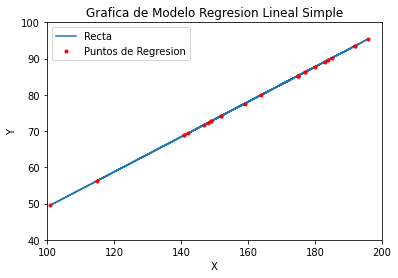

,X,f(X)
0,152,74.188976
1,185,90.133576
2,180,87.717727
3,196,95.448442
4,142,69.357280
5,101,49.547323
6,149,72.739467
7,115,56.311698
8,175,85.301879
9,164,79.987013


In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Funcion Regresion Lineal Simple
def lineal(xi, a1, a0):
  return ((xi * a1) + a0)

# Funcion para calcular la suma de una multiplicacion
def multiplicar(datos1, datos2):
  sumatoria = 0

  for i in range(0, 25):
    num = (datos1[i]) * (datos2[i])
    sumatoria = sumatoria + num

  return sumatoria  

#--------------------------------------

y_SIMPLE = [] # Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Simple

x = final # Variable Dependiente
y = exam1 # Variable Independiente

n = len(x) # Cantidad de datos
sum_x = sum(x) # Sumatoria de los 'X'
sum_y = sum(y) # Sumatoria de los 'Y'
sum_x2 = multiplicar(x, x) # Sumatoria de (X^2) o (X * X)
sum_xy = multiplicar(x, y) # Sumatoria de (X * Y)

#Sumatorias en valor inicial
ST_L = 0
SR_L = 0

# Calculo de A1 y A0
A1 = (n * sum_xy - sum_x * sum_y)/(n * sum_x2 - pow(sum_x,2))
A0 = (sum_y/n) - A1 * (sum_x/n)

# Calculo de ST
for i in range(0, 25):
  diff_y = pow(y[i] - (sum_y / n), 2)
  ST_L = ST_L + diff_y

# Calculo de SR y obtengo los 'Y' de la funcion de regresion lineal simple
for i in range(0, 25):
  fun_regresion = lineal(x[i], A1, A0)
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_L = SR_L + diff_y
  y_SIMPLE.append(fun_regresion)

# Medida de desempeño
R2 = (ST_L - SR_L)/ST_L

# Imprimir los datos obtenidos
print("\nDATOS:"); print("  Cantidad de datos = " + str(n))
print("  Sumatoria x = " + str(sum_x))
print("  Sumatoria y = " + str(sum_y))
print("  Sumatoria x^2 = " + str(sum_x2))
print("  Sumatoria x*y = " + str(sum_xy))
print("  A1 = " + str(A1)); print("  A0 = " + str(A0))
print("  ST = " + str(ST_L)); print("  SR = " + str(SR_L))
print("  R^2 = " + str(R2))
print("\n")

# Genero la grafica
plt.title("Grafica de Modelo Regresion Lineal Simple")
plt.plot(x, y_SIMPLE)
plt.plot(x, y_SIMPLE, 'r.')
plt.xlim(100, 200)
plt.ylim(40, 100)
plt.legend(["Recta", "Puntos de Regresion"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Tabla de los 'X' y los 'Y' de la funcion de regresion lineal
tabla = pd.DataFrame({'X': x, 'f(X)': y_SIMPLE})
tabla

Regresion Lineal Multiple
--

In [ ]:
import numpy as np

def multiple(a0, a1, a2, a3, x1, x2, x3):
  return (a0 + a1*x1 + a2*x2 + a3*x3)

x1 = exam1
x2 = exam2
x3 = exam3
y = final

n = len(x1)
sumX1 = sum(x1)
sumX2 = sum(x2)
sumX3 = sum(x3)

sumX1_2 = multiplicar(x1,x1)
sumX2_2 = multiplicar(x2,x2)
sumX3_2 = multiplicar(x3,x3)

sumX1_X2 = multiplicar(x1,x2)
sumX1_X3 = multiplicar(x1,x3)
sumX2_X3 = multiplicar(x2,x3)

sumY = sum(y)
sumY_X1 = multiplicar(y,x1)
sumY_X2 = multiplicar(y,x2)
sumY_X3 = multiplicar(y,x3)

matriz = np.array([ [n, sumX1, sumX2, sumX3],[sumX1, sumX1_2, sumX1_X2, sumX1_X3], 
                   [sumX2, sumX1_X2, sumX2_2, sumX2_X3],[sumX3, sumX1_X3, sumX2_X3,sumX3_2] ])

solucion = np.array([[sumY],[sumY_X1],[sumY_X2],[sumY_X3]])

a = np.linalg.inv(matriz).dot(solucion)
A0 = a[0]; A1 = a[1]; A2 = a[2]; A3 = a[3]

ST_M = 0; SR_M = 0

for i in range(0, 25):
  diff_y = pow(y[i] - (sumY / n), 2)
  ST_M = ST_M + diff_y

y_MULTIPLE = []

for i in range(0, 25):
  fun_regresion = multiple(A0, A1, A2, A3, x1[i], x2[i], x3[i])
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_M = SR_M + diff_y
  y_MULTIPLE.append(fun_regresion)


R2 = (ST_M - SR_M)/ST_M
print("DATOS:")
print("  R^2 = " + str(R2))

DATOS:
  R^2 = [0.98966158]
